In [1]:
import pandas as pd
import numpy as np
import ggplot
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

/Users/akinbi/miniconda3/envs/heroin/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/akinbi/miniconda3/envs/heroin/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/akinbi/miniconda3/envs/heroin/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
df = pd.read_csv('Cincinnati_Fire_Incidents__CAD_.csv')
df
df.drop('INCIDENT_TYPE_DESCRIPTION', axis = 1, inplace=True)
df.drop('AGENCY', axis = 1, inplace=True)
df.drop('CITY', axis = 1, inplace=True)
heroin_df = df[df['INCIDENT_TYPE_ID'] == 'HEROIN']
heroin_df = heroin_df[heroin_df['DISPOSITION_1_TEXT']!='CN: CANCEL'] #remove cancelled
heroin_df.drop('ADDRESS_X', axis = 1, inplace=True)
heroin_df.drop('EVENT_NUMBER', axis = 1, inplace=True)
heroin_df.drop('INCIDENT_TYPE_ID', axis = 1, inplace=True)
heroin_df.drop('DISPOSITION_1_TEXT', axis = 1, inplace=True)
heroin_df = heroin_df.dropna()

In [32]:
neighborhood_counts_dict = heroin_df.NEIGHBORHOOD.value_counts().to_dict()
neighborhood_dict = {}
count = 0
for neighborhood in neighborhood_counts_dict:
    neighborhood_dict[neighborhood]=count
    count+=1
neighborhood_dict
heroin_df['NEIGHBHORHOODS_AS_NUMBERS'] = heroin_df.NEIGHBORHOOD.map(neighborhood_dict) #http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
heroin_df.head()

,LATITUDE_X,LONGITUDE_X,CREATE_TIME_INCIDENT,NEIGHBORHOOD,NEIGHBHORHOODS_AS_NUMBERS
17,39.106706,-84.515050,03/23/2017 03:49:34 PM,OVER-THE-RHINE,4
78,39.107512,-84.503260,03/23/2017 05:39:17 AM,PENDLETON,12
82,39.106754,-84.423188,03/23/2017 12:21:07 PM,LINWOOD,24
171,39.107357,-84.507868,03/23/2017 01:28:49 AM,PENDLETON,12
177,39.122713,-84.491797,03/24/2017 12:24:39 PM,WALNUT HILLS,15


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(heroin_df, test_size = 0.2)

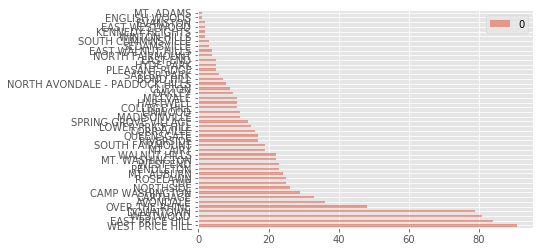

In [59]:
neighborhood_countsdf = pd.DataFrame.from_dict(neighborhood_counts_dict, orient='index')
neighborhood_countsdf.plot.barh(alpha = 0.5)
plt.show()

In [ ]:
# pd.get_dummies(heroin_df.NEIGHBORHOOD)
# heroin_df.NEIGHBORHOOD.value_counts() #use to make bar chart!!!--46 neighborhoods